# __`Logistic-Regression With ROC Curve and AUC Score`__

In [28]:
# Import libraries

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [29]:
# Generate 2 class dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 10000, n_classes = 2, random_state = 1)

X.shape, y.shape

((10000, 20), (10000,))

In [30]:
# Split the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, X_test.shape

((7500, 20), (2500, 20))

In [31]:
# Create a dummy model with default 0 as output

dummy_model_prob = [0 for i in range(len(y_test))]

print("Size is :", len(dummy_model_prob))

dummy_model_prob

Size is : 2500


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [32]:
# Create basic logistic model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs = -1)

model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [33]:
# Prediction based on probability
model_prob = model.predict_proba(X_test)

model_prob

array([[6.12776768e-05, 9.99938722e-01],
       [7.73418157e-01, 2.26581843e-01],
       [4.05782726e-01, 5.94217274e-01],
       ...,
       [7.86644146e-01, 2.13355854e-01],
       [2.10306799e-05, 9.99978969e-01],
       [9.61055448e-01, 3.89445515e-02]])

In [34]:
# Take only +ve Outcome

model_prob = model_prob[:, 1]

model_prob

array([0.99993872, 0.22658184, 0.59421727, ..., 0.21335585, 0.99997897,
       0.03894455])

In [35]:
# Calulate the scores
from sklearn.metrics import roc_auc_score

dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9442296808295412


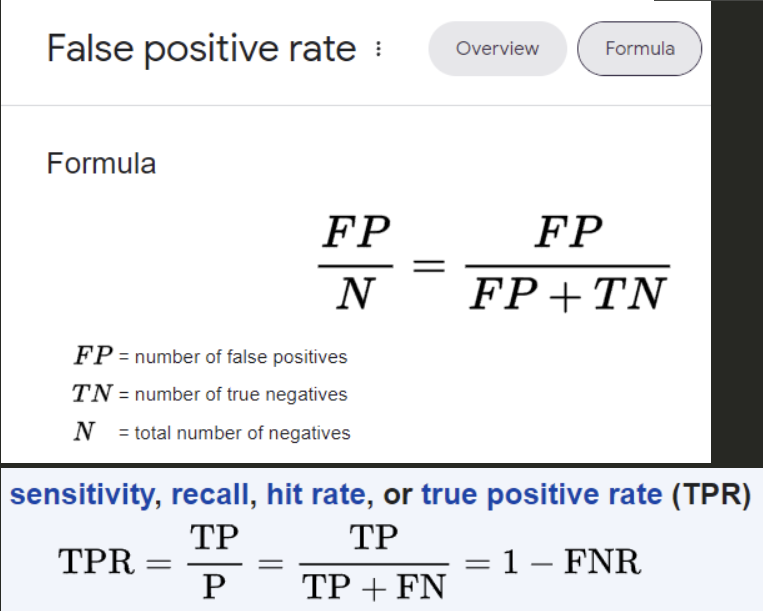

In [36]:
# Calculate ROC Curves
from sklearn.metrics import roc_curve

dummy_fpr, dummy_tpr, dummy_threshold = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_prob)

model_fpr,model_tpr

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.15660685e-04,
        8.15660685e-04, 1.63132137e-03, 1.63132137e-03, 2.44698206e-03,
        2.44698206e-03, 3.26264274e-03, 3.26264274e-03, 4.07830343e-03,
        4.07830343e-03, 4.89396411e-03, 4.89396411e-03, 5.70962480e-03,
        5.70962480e-03, 6.52528548e-03, 6.52528548e-03, 7.34094617e-03,
        7.34094617e-03, 8.15660685e-03, 8.15660685e-03, 8.97226754e-03,
        8.97226754e-03, 9.78792822e-03, 9.78792822e-03, 1.06035889e-02,
        1.06035889e-02, 1.14192496e-02, 1.14192496e-02, 1.22349103e-02,
        1.22349103e-02, 1.30505710e-02, 1.30505710e-02, 1.38662316e-02,
        1.38662316e-02, 1.46818923e-02, 1.46818923e-02, 1.54975530e-02,
        1.54975530e-02, 1.63132137e-02, 1.63132137e-02, 1.79445351e-02,
        1.79445351e-02, 1.87601958e-02, 1.87601958e-02, 2.03915171e-02,
        2.03915171e-02, 2.12071778e-02, 2.12071778e-02, 2.28384992e-02,
        2.28384992e-02, 2.44698206e-02, 2.44698206e-02, 2.528548

In [37]:
dummy_threshold

array([inf,  0.])

In [38]:
threshold

array([           inf, 9.99985059e-01, 9.99817598e-01, 9.99813358e-01,
       9.90436731e-01, 9.90338751e-01, 9.82043516e-01, 9.81909673e-01,
       9.71207971e-01, 9.71092640e-01, 9.63816442e-01, 9.63784420e-01,
       9.58903060e-01, 9.58894362e-01, 9.54711471e-01, 9.53990555e-01,
       9.53293219e-01, 9.53044768e-01, 9.51262844e-01, 9.50854642e-01,
       9.50259170e-01, 9.49508437e-01, 9.36959061e-01, 9.36857505e-01,
       9.13610699e-01, 9.10820302e-01, 9.09126302e-01, 9.08971104e-01,
       9.07944067e-01, 9.07425057e-01, 9.00678940e-01, 9.00205743e-01,
       8.85565545e-01, 8.82348515e-01, 8.66605718e-01, 8.66336894e-01,
       8.65647476e-01, 8.65010399e-01, 8.63844910e-01, 8.63698068e-01,
       8.61894533e-01, 8.61716645e-01, 8.50767800e-01, 8.49189477e-01,
       8.43323375e-01, 8.42656601e-01, 8.37966291e-01, 8.36755216e-01,
       8.33786464e-01, 8.33778921e-01, 8.24114417e-01, 8.20997377e-01,
       8.08747999e-01, 8.08416920e-01, 8.07464000e-01, 8.06581878e-01,
      

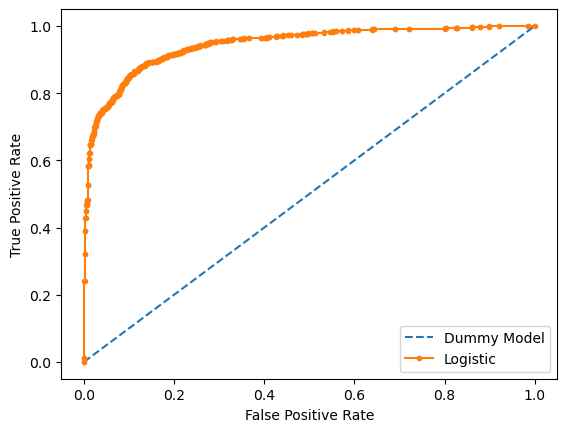

In [41]:
# Plot ROC curve for the model 
plt.plot(dummy_fpr, dummy_tpr, ls = '--', label = 'Dummy Model')
plt.plot(model_fpr, model_tpr, marker = '.', label = 'Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

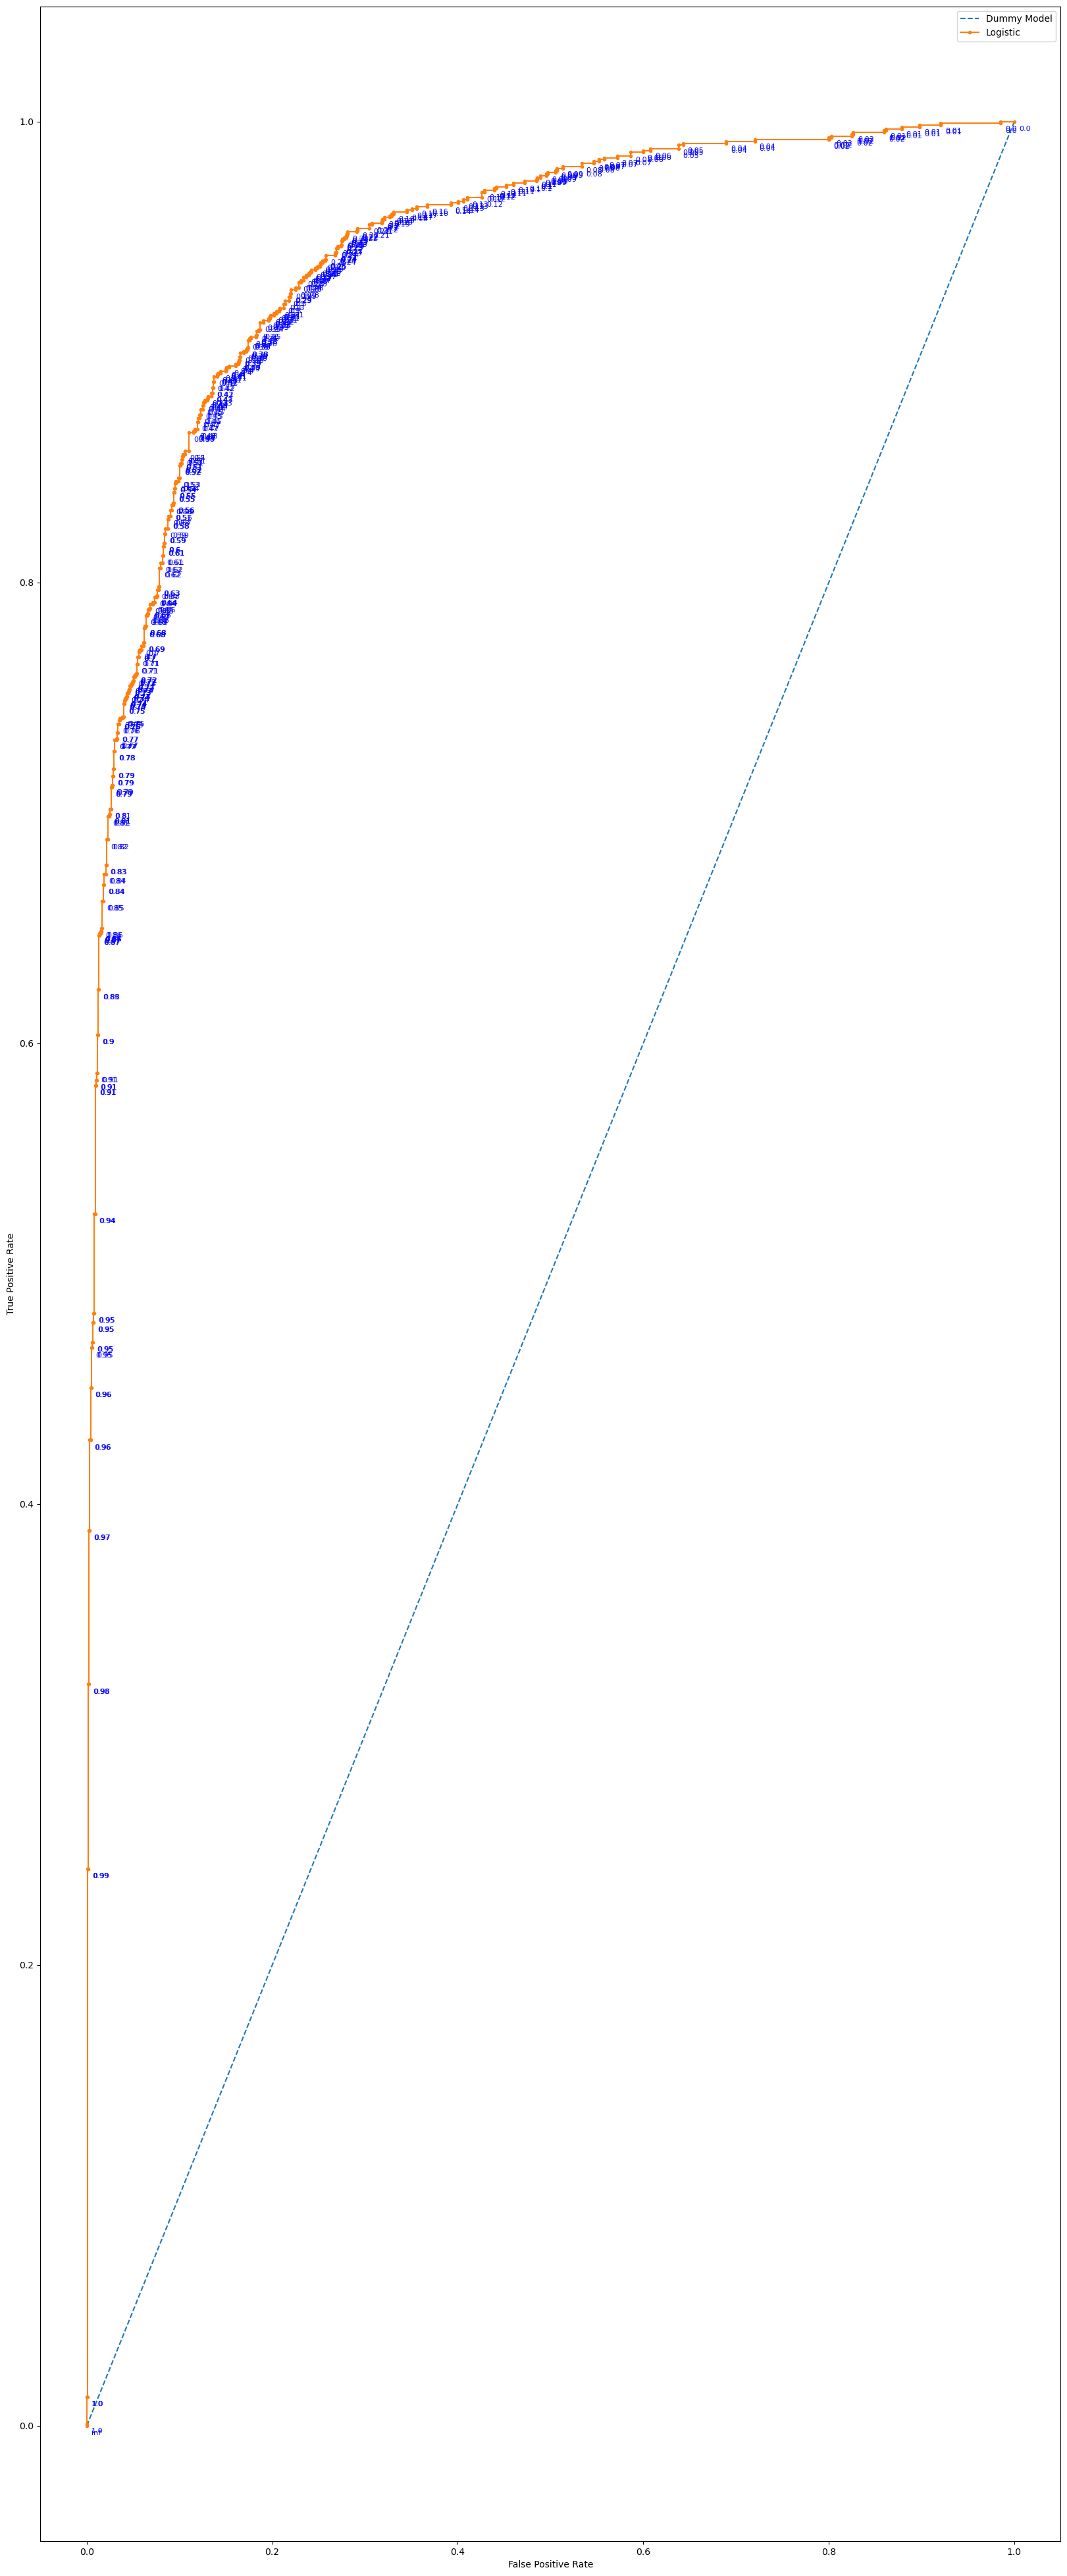

In [40]:
# Plot ROC curve for the model with annotated thresholds
import numpy as np
fig, ax = plt.subplots(figsize=(20, 50))
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate thresholds on the ROC curve
for fpr, tpr, thr in zip(model_fpr, model_tpr, threshold):
    ax.annotate(f'{np.round(thr, 2)}', xy=(fpr, tpr), textcoords='offset points', xytext=(5, -10), fontsize=8, color='blue')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()